In [50]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

df = pd.read_csv('data-final.csv', delimiter="\t")
df.head()

EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  EST1  EST2  \
0   4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0   1.0   4.0   
1   3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0   2.0   3.0   
2   2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0   4.0   4.0   
3   2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0   3.0   3.0   
4   3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0   1.0   5.0   

   EST3  EST4  EST5  EST6  EST7  EST8  EST9  EST10  AGR1  AGR2  AGR3  AGR4  \
0   4.0   2.0   2.0   2.0   2.0   2.0   3.0    2.0   2.0   5.0   2.0   4.0   
1   4.0   1.0   3.0   1.0   2.0   1.0   3.0    1.0   1.0   4.0   1.0   5.0   
2   4.0   2.0   2.0   2.0   2.0   2.0   1.0    3.0   1.0   4.0   1.0   4.0   
3   3.0   2.0   3.0   2.0   2.0   2.0   4.0    3.0   2.0   4.0   3.0   4.0   
4   5.0   3.0   1.0   1.0   1.0   1.0   3.0    2.0   1.0   5.0   1.0   5.0   

   AGR5  AGR6  AGR7  AGR8  AGR9  AGR10  CSN1  CSN2  CSN3  CSN4  CSN5  CSN6  \
0   2.0   3.0   2.0   4.0   3.0    4.0   3.0   4.0   3.0   2.0   2.0   4.0   
1   1.0   5.0   3.0   4.0   5.0    3.0   3.0   2.0   5.0   3.0   3.0   1.0   
2   2.0   4.0   1.0   4.0   4.0    3.0   4.0   2.0   2.0   2.0   3.0   3.0   
3   2.0   4.0   2.0   4.0   3.0    4.0   2.0   4.0   4.0   4.0   1.0   2.0   
4   1.0   3.0   1.0   5.0   5.0    3.0   5.0   1.0   5.0   1.0   3.0   1.0   

   CSN7  CSN8  CSN9  CSN10  OPN1  OPN2  OPN3  OPN4  OPN5  OPN6  OPN7  OPN8  \
0   4.0   2.0   4.0    4.0   5.0   1.0   4.0   1.0   4.0   1.0   5.0   3.0   
1   3.0   3.0   5.0    3.0   1.0   2.0   4.0   2.0   3.0   1.0   4.0   2.0   
2   4.0   2.0   4.0    2.0   5.0   1.0   2.0   1.0   4.0   2.0   5.0   3.0   
3   2.0   3.0   1.0    4.0   4.0   2.0   5.0   2.0   3.0   1.0   4.0   4.0   
4   5.0   1.0   5.0    5.0   5.0   1.0   5.0   1.0   5.0   1.0   5.0   3.0   

   OPN9  OPN10  EXT1_E  EXT2_E  EXT3_E  EXT4_E  EXT5_E  EXT6_E  EXT7_E  \
0   4.0    5.0  9419.0  5491.0  3959.0  4821.0  5611.0  2756.0  2388.0   
1   5.0    3.0  7235.0  3598.0  3315.0  2564.0  2976.0  3050.0  4787.0   
2   4.0    4.0  4657.0  3549.0  2543.0  3335.0  5847.0  2540.0  4922.0   
3   3.0    3.0  3996.0  2896.0  5096.0  4240.0  5168.0  5456.0  4360.0   
4   5.0    5.0  6004.0  3965.0  2721.0  3706.0  2968.0  2426.0  7339.0   

   EXT8_E   EXT9_E  EXT10_E  EST1_E  EST2_E  EST3_E  EST4_E  EST5_E  EST6_E  \
0  2113.0   5900.0   4110.0  6135.0  4150.0  5739.0  6364.0  3663.0  5070.0   
1  3228.0   3465.0   3309.0  9036.0  2406.0  3484.0  3359.0  3061.0  2539.0   
2  3142.0  14621.0   2191.0  5128.0  3675.0  3442.0  4546.0  8275.0  2185.0   
3  4496.0   5240.0   4000.0  3736.0  4616.0  3015.0  2711.0  3960.0  4064.0   
4  3302.0  16819.0   3731.0  4740.0  2856.0  7461.0  2179.0  3324.0  2255.0   

   EST7_E  EST8_E  EST9_E  EST10_E  AGR1_E   AGR2_E   AGR3_E  AGR4_E   AGR5_E  \
0  5709.0  4285.0  2587.0   3997.0  4750.0   5475.0  11641.0  3115.0   3207.0   
1  4226.0  2962.0  1799.0   1607.0  2158.0   2090.0   2143.0  2807.0   3422.0   
2  2164.0  1175.0  3813.0   1593.0  1089.0   2203.0   3386.0  1464.0   2562.0   
3  4208.0  2936.0  7336.0   3896.0  6062.0  11952.0   1040.0  2264.0   3664.0   
4  4308.0  4506.0  3127.0   3115.0  6771.0   2819.0   3682.0  2511.0  16204.0   

   AGR6_E   AGR7_E   AGR8_E  AGR9_E  AGR10_E  CSN1_E  CSN2_E  CSN3_E  CSN4_E  \
0  3260.0  10235.0   5897.0  1758.0   3081.0  6602.0  5457.0  1569.0  2129.0   
1  5324.0   4494.0   3627.0  1850.0   1747.0  5163.0  5240.0  7208.0  2783.0   
2  1493.0   3067.0  13719.0  3892.0   4100.0  4286.0  4775.0  2713.0  2813.0   
3  3049.0   4912.0   7545.0  4632.0   6896.0  2824.0   520.0  2368.0  3225.0   
4  1736.0  28983.0   1612.0  2437.0   4532.0  3843.0  7019.0  3102.0  3153.0   

   CSN5_E  CSN6_E  CSN7_E   CSN8_E   CSN9_E  CSN10_E  OPN1_E  OPN2_E   OPN3_E  \
0  3762.0  4420.0  9382.0   5286.0   4983.0   6339.0  3146.0  4067.0   2959.0   
1  4103.0  3431.0  3347.0   2399.0   3360.0   5595.0  2624.0  4985.0   1684.0

In [51]:
columns = df.columns

#to see no.of columns
for column in columns:
    print(column)

EXT1
EXT2
EXT3
EXT4
EXT5
EXT6
EXT7
EXT8
EXT9
EXT10
EST1
EST2
EST3
EST4
EST5
EST6
EST7
EST8
EST9
EST10
AGR1
AGR2
AGR3
AGR4
AGR5
AGR6
AGR7
AGR8
AGR9
AGR10
CSN1
CSN2
CSN3
CSN4
CSN5
CSN6
CSN7
CSN8
CSN9
CSN10
OPN1
OPN2
OPN3
OPN4
OPN5
OPN6
OPN7
OPN8
OPN9
OPN10
EXT1_E
EXT2_E
EXT3_E
EXT4_E
EXT5_E
EXT6_E
EXT7_E
EXT8_E
EXT9_E
EXT10_E
EST1_E
EST2_E
EST3_E
EST4_E
EST5_E
EST6_E
EST7_E
EST8_E
EST9_E
EST10_E
AGR1_E
AGR2_E
AGR3_E
AGR4_E
AGR5_E
AGR6_E
AGR7_E
AGR8_E
AGR9_E
AGR10_E
CSN1_E
CSN2_E
CSN3_E
CSN4_E
CSN5_E
CSN6_E
CSN7_E
CSN8_E
CSN9_E
CSN10_E
OPN1_E
OPN2_E
OPN3_E
OPN4_E
OPN5_E
OPN6_E
OPN7_E
OPN8_E
OPN9_E
OPN10_E
dateload
screenw
screenh
introelapse
testelapse
endelapse
IPC
country
lat_appx_lots_of_err
long_appx_lots_of_err


In [52]:
X = df[df.columns[0:50]]

pd.set_option('display.max_columns', None)

X

EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  EST1  \
0         4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0   1.0   
1         3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0   2.0   
2         2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0   4.0   
3         2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0   3.0   
4         3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0   1.0   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   ...   
1015336   4.0   2.0   4.0   3.0   4.0   3.0   3.0   3.0   3.0    3.0   4.0   
1015337   4.0   3.0   4.0   3.0   3.0   3.0   4.0   4.0   3.0    3.0   4.0   
1015338   4.0   2.0   4.0   3.0   5.0   1.0   4.0   2.0   4.0    4.0   3.0   
1015339   2.0   4.0   3.0   4.0   2.0   2.0   1.0   4.0   2.0    4.0   4.0   
1015340   4.0   2.0   4.0   2.0   4.0   1.0   4.0   2.0   4.0    4.0   4.0   

         EST2  EST3  EST4  EST5  EST6  EST7  EST8  EST9  EST10  AGR1  AGR2  \
0         4.0   4.0   2.0   2.0   2.0   2.0   2.0   3.0    2.0   2.0   5.0   
1         3.0   4.0   1.0   3.0   1.0   2.0   1.0   3.0    1.0   1.0   4.0   
2         4.0   4.0   2.0   2.0   2.0   2.0   2.0   1.0    3.0   1.0   4.0   
3         3.0   3.0   2.0   3.0   2.0   2.0   2.0   4.0    3.0   2.0   4.0   
4         5.0   5.0   3.0   1.0   1.0   1.0   1.0   3.0    2.0   1.0   5.0   
...       ...   ...   ...   ...   ...   ...   ...   ...    ...   ...   ...   
1015336   3.0   3.0   3.0   4.0   3.0   4.0   3.0   3.0    3.0   5.0   4.0   
1015337   3.0   5.0   1.0   5.0   5.0   4.0   4.0   4.0    5.0   2.0   4.0   
1015338   2.0   4.0   3.0   2.0   2.0   4.0   2.0   4.0    1.0   3.0   5.0   
1015339   3.0   4.0   2.0   4.0   4.0   2.0   2.0   4.0    4.0   2.0   3.0   
1015340   3.0   4.0   3.0   2.0   3.0   3.0   1.0   4.0    2.0   1.0   5.0   

         AGR3  AGR4  AGR5  AGR6  AGR7  AGR8  AGR9  AGR10  CSN1  CSN2  CSN3  \
0         2.0   4.0   2.0   3.0   2.0   4.0   3.0    4.0   3.0   4.0   3.0   
1         1.0   5.0   1.0   5.0   3.0   4.0   5.0    3.0   3.0   2.0   5.0   
2         1.0   4.0   2.0   4.0   1.0   4.0   4.0    3.0   4.0   2.0   2.0   
3         3.0   4.0   2.0   4.0   2.0   4.0   3.0    4.0   2.0   4.0   4.0   
4         1.0   5.0   1.0   3.0   1.0   5.0   5.0    3.0   5.0   1.0   5.0   
...       ...   ...   ...   ...   ...   ...   ...    ...   ...   ...   ...   
1015336   2.0   5.0   2.0   4.0   2.0   4.0   4.0    4.0   2.0   3.0   3.0   
1015337   1.0   4.0   3.0   5.0   3.0   3.0   5.0    3.0   3.0   2.0   3.0   
1015338   5.0   3.0   2.0   3.0   2.0   4.0   3.0    5.0   4.0   5.0   3.0   
1015339   2.0   4.0   3.0   4.0   2.0   4.0   4.0    3.0   4.0   2.0   4.0   
1015340   2.0   4.0   3.0   5.0   2.0   3.0   4.0    5.0   3.0   4.0   3.0   

         CSN4  CSN5  CSN6  CSN7  CSN8  CSN9  CSN10  OPN1  OPN2  OPN3  OPN4  \
0         2.0   2.0   4.0   4.0   2.0   4.0    4.0   5.0   1.0   4.0   1.0   
1         3.0   3.0   1.0   3.0   3.0   5.0    3.0   1.0   2.0   4.0   2.0   
2         2.0   3.0   3.0   4.0   2.0   4.0    2.0   5.0   1.0   2.0   1.0   
3         4.0   1.0   2.0   2.0   3.0   1.0    4.0   4.0   2.0   5.0   2.0   
4         1.0   3.0   1.0   5.0   1.0   5.0    5.0   5.0   1.0   5.0   1.0   
...       ...   ...   ...   ...   ...   ...    ...   ...   ...   ...   ...   
1015336   3.0   4.0   4.0   4.0   2.0   3.0    3.0   2.0   2.0   4.0   3.0   
1015337   4.0   3.0   3.0   2.0   3.0   2.0    3.0   4.0   1.0   5.0   1.0   
1015338   5.0   1.0   5.0   1.0   4.0   1.0    4.0   5.0   1.0   5.0   1.0   
1015339   2.0   2.0   2.0   4.0   2.0   4.0    4.0   5.0   2.0   4.0   2.0   
1015340   3.0   2.0   3.0   3.0   2.0   2.0    3.0   5.0   1.0   5.0   1.0   

         OPN5  OPN6  OPN7  OPN8  OPN9  OPN10  
0         4.0   1.0   5.0   3.0   4.0    5.0  
1         3.0   1.0   4.0   2.0   5.0    3.0  
2         4.0   2.0   5.0   3.0   4.0    4.0  
3         3.0   1.0   4.0   4.0   3.0    3.0  
4         5.0   1.0   5.0 

In [86]:
#to fill in the missing values
X = X.fillna(0)

X_train, X_test = train_test_split(X,random_state=0, test_size=0.2)

In [87]:
kmeans = MiniBatchKMeans(n_clusters=15, random_state=0, batch_size=100, max_iter=100).fit(X)

len(kmeans.cluster_centers_)

C:\Users\sahab\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sahab\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


15

In [92]:
X_pred= kmeans.predict(X_train)
X_pred

array([12,  0,  3, ..., 12,  1,  5])

In [56]:
one = kmeans.cluster_centers_[0]

two = kmeans.cluster_centers_[1]

three = kmeans.cluster_centers_[2]

four = kmeans.cluster_centers_[3]

five = kmeans.cluster_centers_[4]

six = kmeans.cluster_centers_[5]

seven = kmeans.cluster_centers_[6]

eight = kmeans.cluster_centers_[7]

nine= kmeans.cluster_centers_[8]

ten = kmeans.cluster_centers_[9]

eleven = kmeans.cluster_centers_[10]

twelve = kmeans.cluster_centers_[11]

thirteen = kmeans.cluster_centers_[12]

fourteen = kmeans.cluster_centers_[13]

fifteen = kmeans.cluster_centers_[14]






In [57]:
one

array([1.52092414, 4.04468273, 1.96144076, 4.22916277, 1.87343905,
       3.93349734, 1.45934166, 4.28962216, 1.77591785, 4.61670722,
       4.34673904, 2.33633714, 4.49840896, 2.35120464, 3.74326818,
       4.0055352 , 3.99681793, 3.78236222, 4.16161724, 3.88763805,
       2.82193759, 2.82814129, 2.55472364, 3.50677862, 2.94176003,
       3.70382651, 3.20111239, 3.16207182, 3.30205631, 2.75511405,
       2.88624756, 2.79022381, 3.65804744, 3.25959302, 2.37674145,
       3.05880151, 3.76332326, 2.93534241, 3.00604327, 3.16613632,
       2.83750033, 3.06762575, 3.44359173, 2.77904645, 2.82495922,
       2.79966307, 3.24389657, 2.50426505, 3.97574672, 2.91689173])

In [58]:
one_scores = {}

one_scores['extroversion_score'] =  one[0] - one[1] + one[2] - one[3] + one[4] - one[5] + one[6] - one[7] + one[8] - one[9]
one_scores['neuroticism_score'] =  one[0] - one[1] + one[2] - one[3] + one[4] + one[5] + one[6] + one[7] + one[8] + one[9]
one_scores['agreeableness_score'] =  -one[0] + one[1] - one[2] + one[3] - one[4] - one[5] + one[6] - one[7] + one[8] + one[9]
one_scores['conscientiousness_score'] =  one[0] - one[1] + one[2] - one[3] + one[4] - one[5] + one[6] - one[7] + one[8] + one[9]
one_scores['openness_score'] =  one[0] - one[1] + one[2] - one[3] + one[4] - one[5] + one[6] + one[7] + one[8] + one[9]

one_scores

{'extroversion_score': -12.522608765409002,
 'neuroticism_score': 13.15704468272861,
 'agreeableness_score': 2.5468887878706754,
 'conscientiousness_score': -3.289194320400025,
 'openness_score': 5.290050004011023}

In [59]:
all_types = {'one':one, 'two': two, 'three' :three, 'four':four, 'five':five, 'six': six, 'seven': seven, 'eight': eight,
             'nine': nine, 'ten': ten, 'eleven': eleven, 'twelve': twelve, 'thirteen': thirteen, 'fourteen': fourteen,'fifteen': fifteen}

all_types_scores ={}

for name, personality_type in all_types.items():
    personality_trait = {}

    personality_trait['extroversion_score'] =  personality_type[0] - personality_type[1] +personality_type[2] - personality_type[3] + personality_type[4] - personality_type[5] +personality_type[6] - personality_type[7] + personality_type[8] -personality_type[9]
    personality_trait['neuroticism_score'] =  personality_type[0] - personality_type[1] + personality_type[2] -personality_type[3] + personality_type[4] + personality_type[5] + personality_type[6] + personality_type[7] + personality_type[8] + personality_type[9]
    personality_trait['agreeableness_score'] =  -personality_type[0] +personality_type[1] - personality_type[2] + personality_type[3] - personality_type[4] - personality_type[5] + personality_type[6] - personality_type[7] + personality_type[8] + personality_type[9]
    personality_trait['conscientiousness_score'] = personality_type[0] - personality_type[1] + personality_type[2] -personality_type[3] +personality_type[4] - personality_type[5] +personality_type[6] -personality_type[7] + personality_type[8] + personality_type[9]
    personality_trait['openness_score'] =  personality_type[0] -personality_type[1] + personality_type[2] - personality_type[3] + personality_type[4] - personality_type[5] +personality_type[6] + personality_type[7] + personality_type[8] + personality_type[9]
    
    all_types_scores[name] = personality_trait
    
all_types_scores

{'one': {'extroversion_score': -12.522608765409002,
  'neuroticism_score': 13.15704468272861,
  'agreeableness_score': 2.5468887878706754,
  'conscientiousness_score': -3.289194320400025,
  'openness_score': 5.290050004011023},
 'two': {'extroversion_score': 2.9454539058240345,
  'neuroticism_score': 20.229054897891043,
  'agreeableness_score': -1.2966174737471454,
  'conscientiousness_score': 9.281032875411205,
  'openness_score': 16.22761253100215},
 'three': {'extroversion_score': 0.2388148148148165,
  'neuroticism_score': 0.3982222222222238,
  'agreeableness_score': -0.2269629629629645,
  'conscientiousness_score': 0.32829629629629775,
  'openness_score': 0.36800000000000155},
 'four': {'extroversion_score': 8.76448050484563,
  'neuroticism_score': 22.435166403726246,
  'agreeableness_score': -1.2696266245962424,
  'conscientiousness_score': 14.244647284201047,
  'openness_score': 19.293817143715735},
 'five': {'extroversion_score': 1.4794810953788526,
  'neuroticism_score': 20.133

In [60]:
all_extroversion = []
all_neuroticism =[]
all_agreeableness =[]
all_conscientiousness =[]
all_openness =[]

for personality_type, personality_trait in all_types_scores.items():
    all_extroversion.append(personality_trait['extroversion_score'])
    all_neuroticism.append(personality_trait['neuroticism_score'])
    all_agreeableness.append(personality_trait['agreeableness_score'])
    all_conscientiousness.append(personality_trait['conscientiousness_score'])
    all_openness.append(personality_trait['openness_score'])
    

In [61]:
all_extroversion_normalized = (all_extroversion-min(all_extroversion))/(max(all_extroversion)-min(all_extroversion))
all_neuroticism_normalized = (all_neuroticism-min(all_neuroticism))/(max(all_neuroticism)-min(all_neuroticism))
all_agreeableness_normalized = (all_agreeableness-min(all_agreeableness))/(max(all_agreeableness)-min(all_agreeableness))
all_conscientiousness_normalized = (all_conscientiousness-min(all_conscientiousness))/(max(all_conscientiousness)-min(all_conscientiousness))
all_openness_normalized = (all_openness-min(all_openness))/(max(all_openness)-min(all_openness))


all_extroversion_normalized

array([0.        , 0.62926626, 0.51915573, 0.86599384, 0.56962807,
       0.18707156, 1.        , 0.1390889 , 0.54430615, 0.33006662,
       0.1351904 , 0.80611784, 0.47834332, 0.22592911, 0.76895698])

In [62]:
counter = 0

normalized_all_types_scores ={}

for personality_type, personality_trait in all_types_scores.items():
    normalized_personality_trait ={}
    normalized_personality_trait['extroversion_score'] = all_extroversion_normalized[counter]
    normalized_personality_trait['neuroticism_score'] = all_neuroticism_normalized[counter]
    normalized_personality_trait['agreeableness_score'] = all_agreeableness_normalized[counter]
    normalized_personality_trait['conscientiousness_score'] = all_conscientiousness_normalized[counter]
    normalized_personality_trait['openness_score'] = all_openness_normalized[counter]
    
    normalized_all_types_scores[personality_type] = normalized_personality_trait
    
    counter=counter+1

In [63]:
normalized_all_types_scores

{'one': {'extroversion_score': 0.0,
  'neuroticism_score': 0.5402901605406718,
  'agreeableness_score': 0.9017670206341116,
  'conscientiousness_score': 0.0,
  'openness_score': 0.23730983907502134},
 'two': {'extroversion_score': 0.6292662605306099,
  'neuroticism_score': 0.8397643123538737,
  'agreeableness_score': 0.2868232522856528,
  'conscientiousness_score': 0.644933809837676,
  'openness_score': 0.7646493015018715},
 'three': {'extroversion_score': 0.5191557253197017,
  'neuroticism_score': 0.0,
  'agreeableness_score': 0.4579631778950566,
  'conscientiousness_score': 0.18560062353172438,
  'openness_score': 0.0},
 'four': {'extroversion_score': 0.8659938446969454,
  'neuroticism_score': 0.9331851858982665,
  'agreeableness_score': 0.2911416671282488,
  'conscientiousness_score': 0.8995992746188338,
  'openness_score': 0.9124821196612132},
 'five': {'extroversion_score': 0.5696280726026544,
  'neuroticism_score': 0.8357071702220876,
  'agreeableness_score': 0.46385231642933245,

C:\Users\sahab\AppData\Local\Temp\ipykernel_12240\3083411184.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=df.corr()


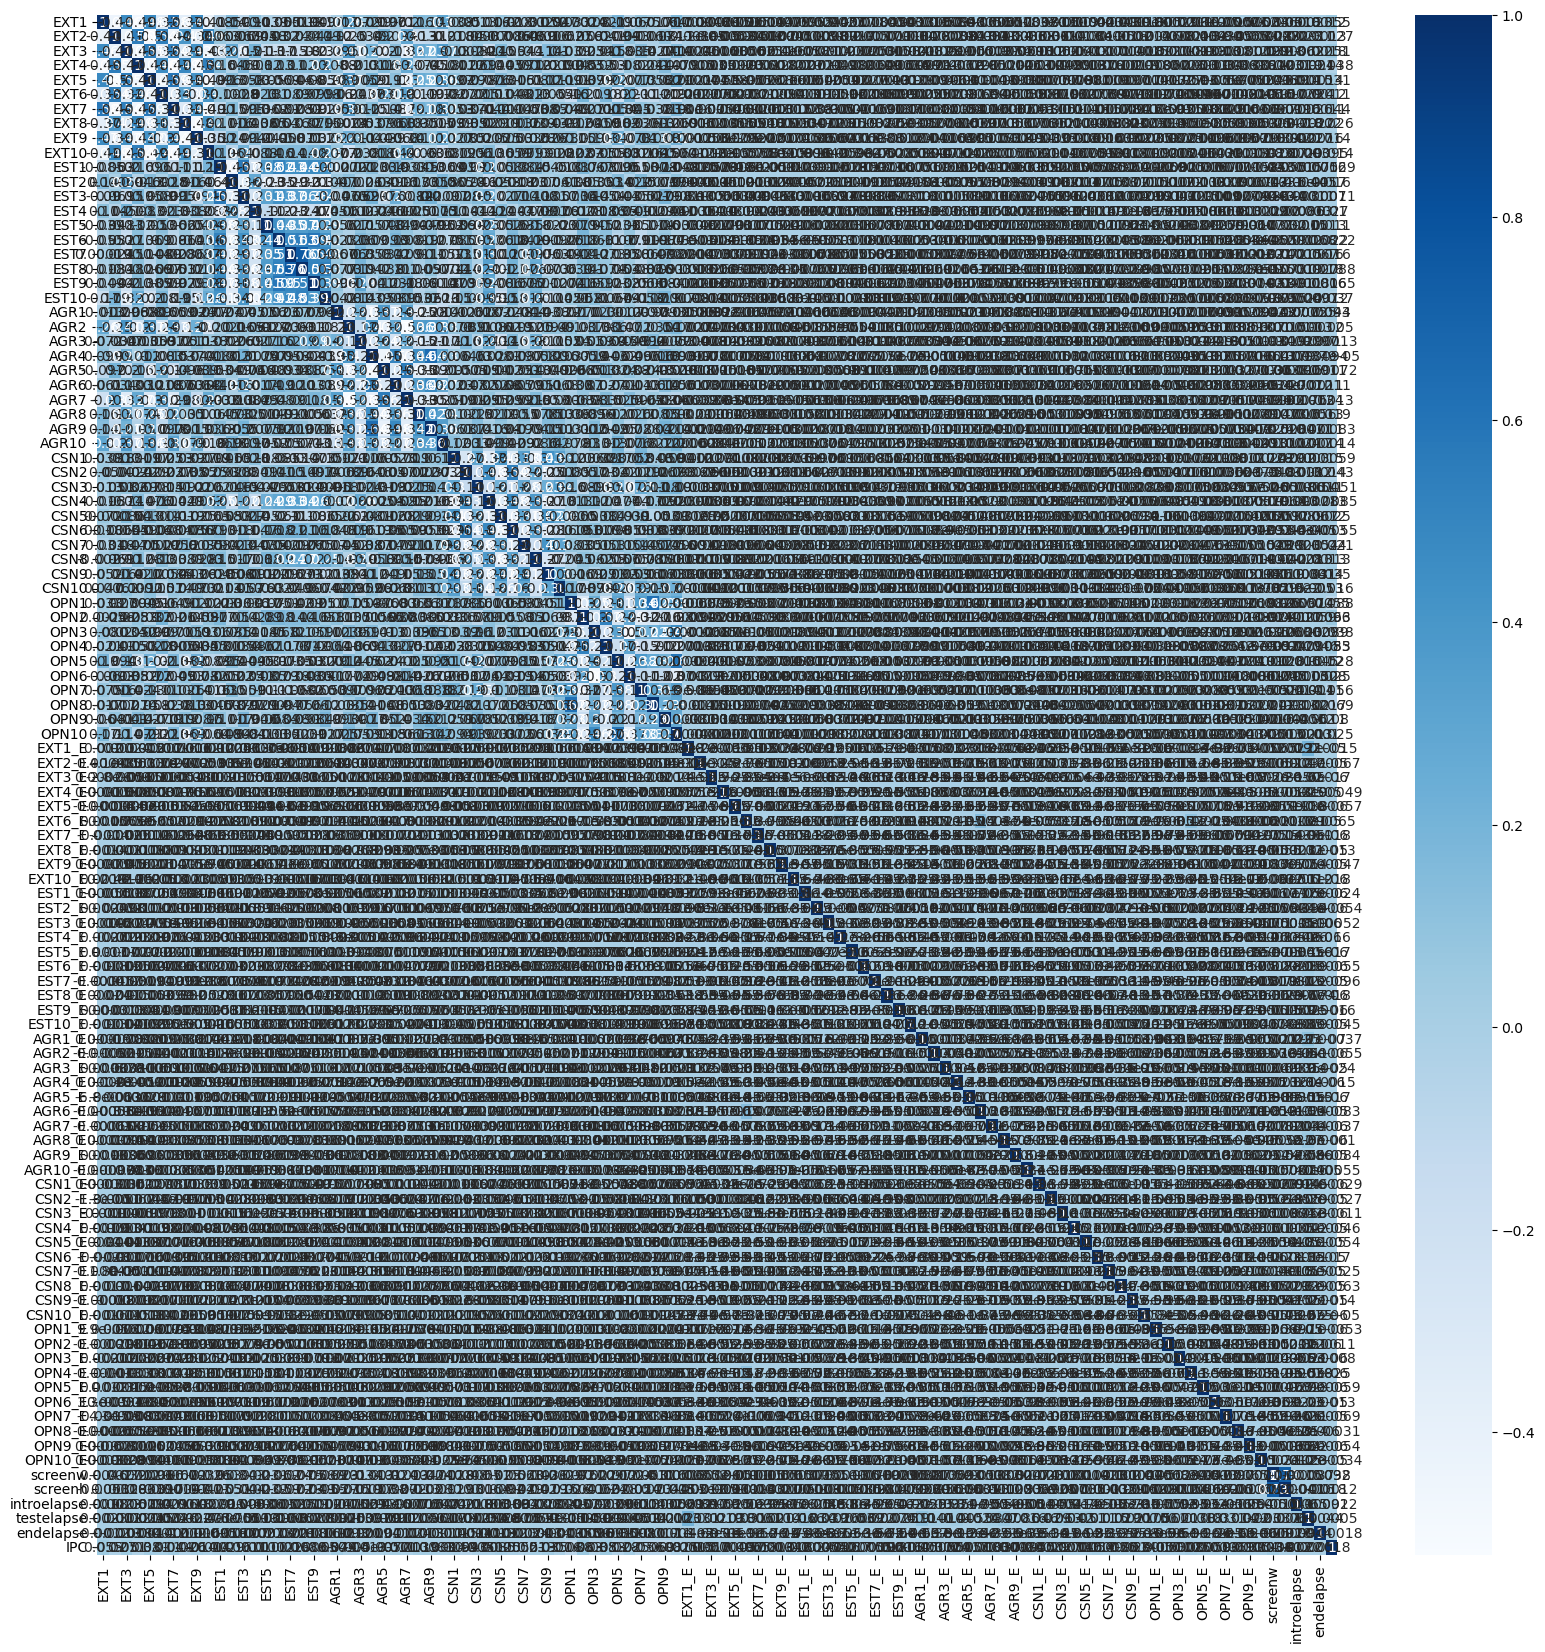

In [64]:
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sn.heatmap(df[top_corr_features].corr(),annot=True,cmap="Blues")

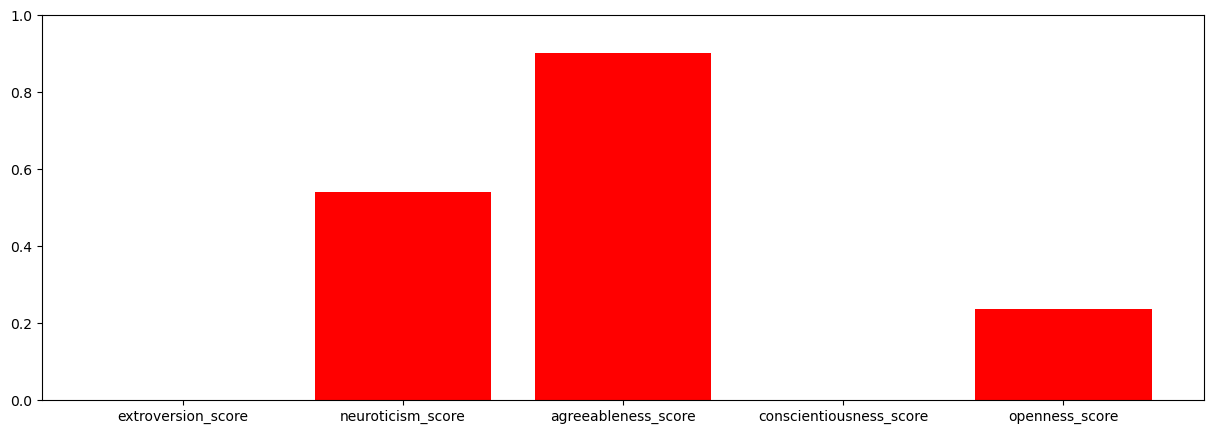

In [65]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['one'].keys()), normalized_all_types_scores['one'].values(), color='r')
plt.show()

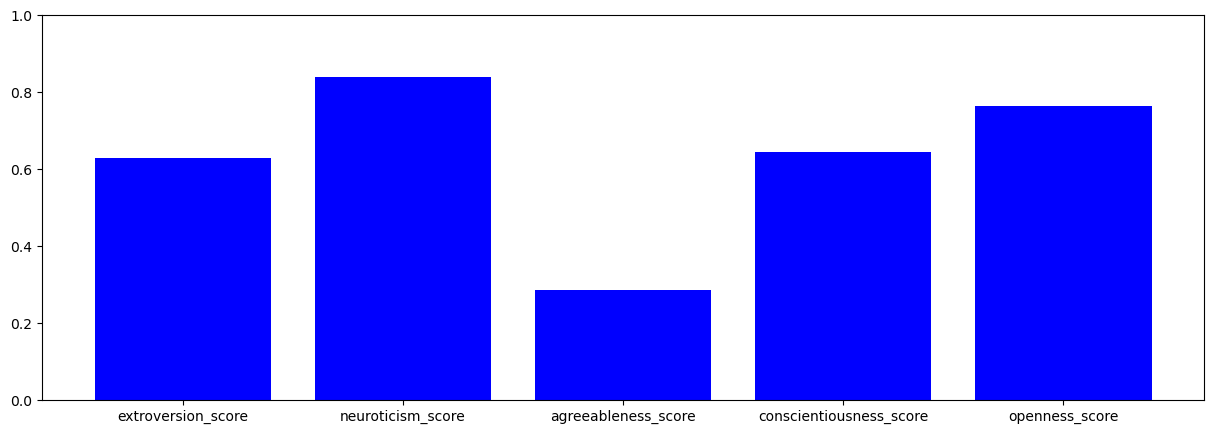

In [66]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['two'].keys()), normalized_all_types_scores['two'].values(), color='b')
plt.show()

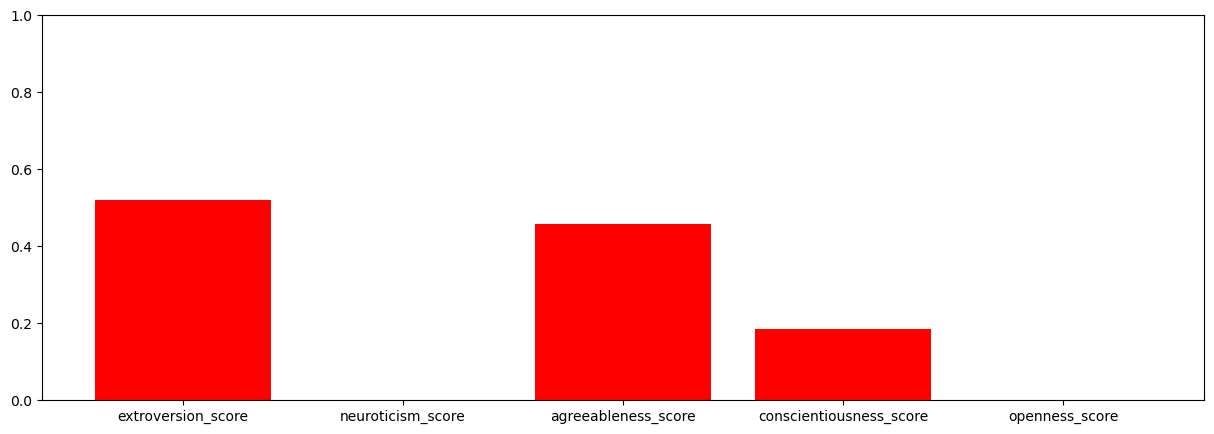

In [67]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['three'].keys()), normalized_all_types_scores['three'].values(), color='r')
plt.show()

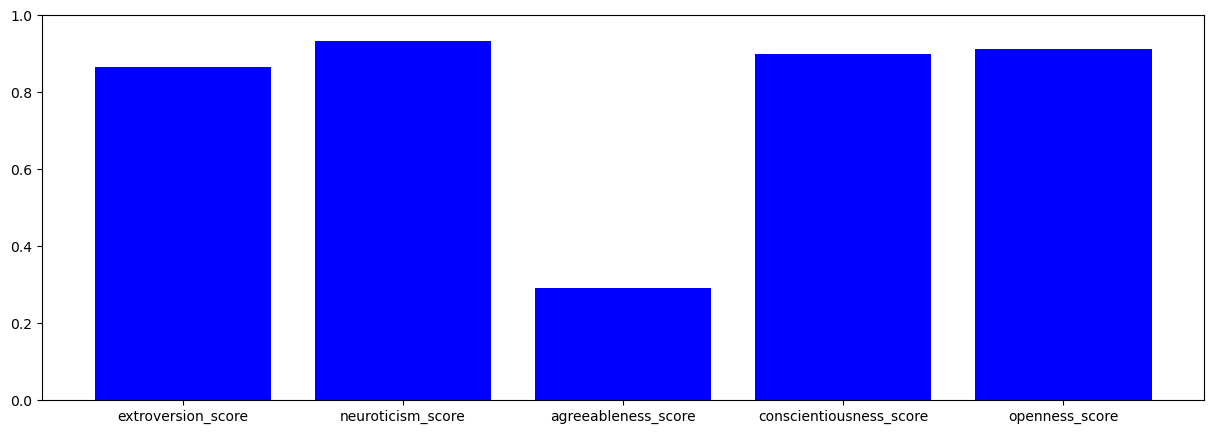

In [68]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['four'].keys()), normalized_all_types_scores['four'].values(), color='b')
plt.show()

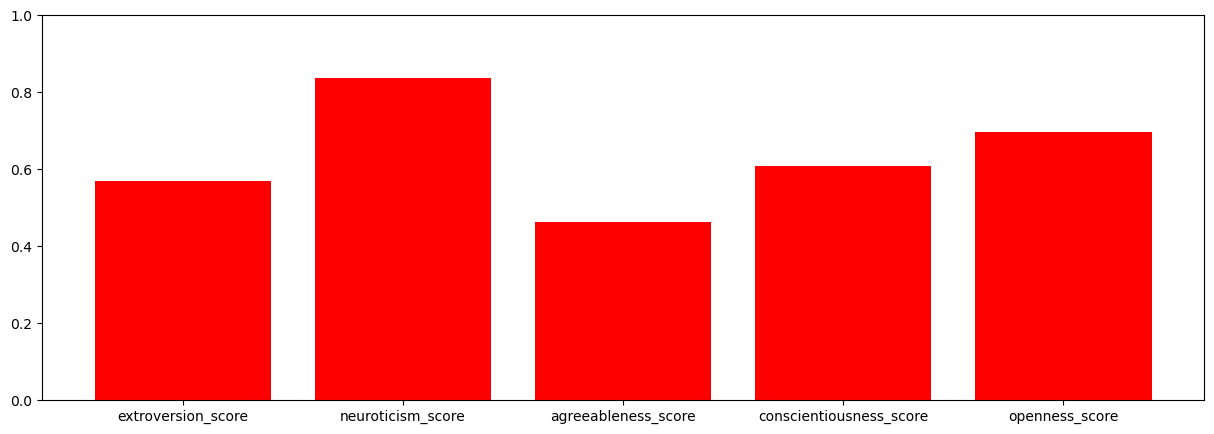

In [69]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['five'].keys()), normalized_all_types_scores['five'].values(), color='r')
plt.show()

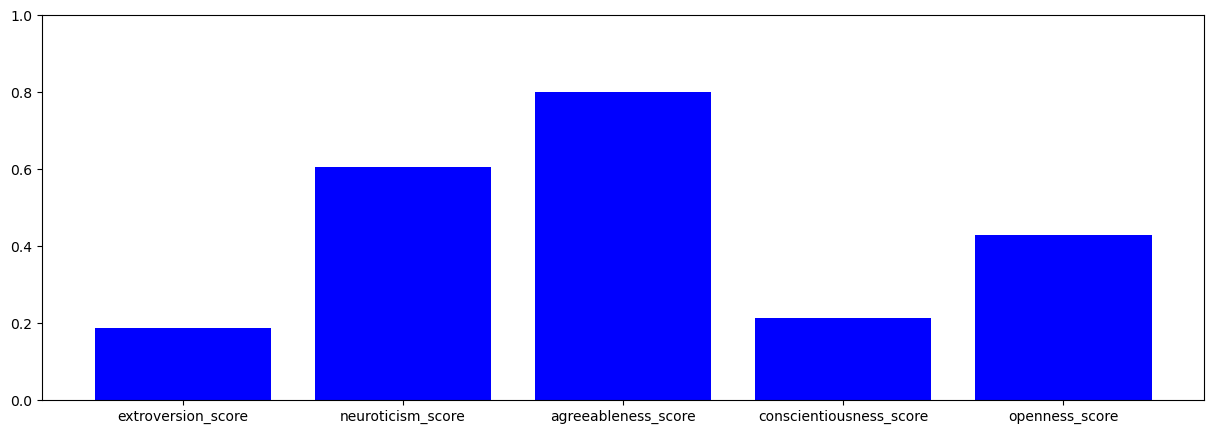

In [70]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['six'].keys()), normalized_all_types_scores['six'].values(), color='b')
plt.show()

In [71]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['seven'].keys()), normalized_all_types_scores['seven'].values(), color='r')
plt.show()

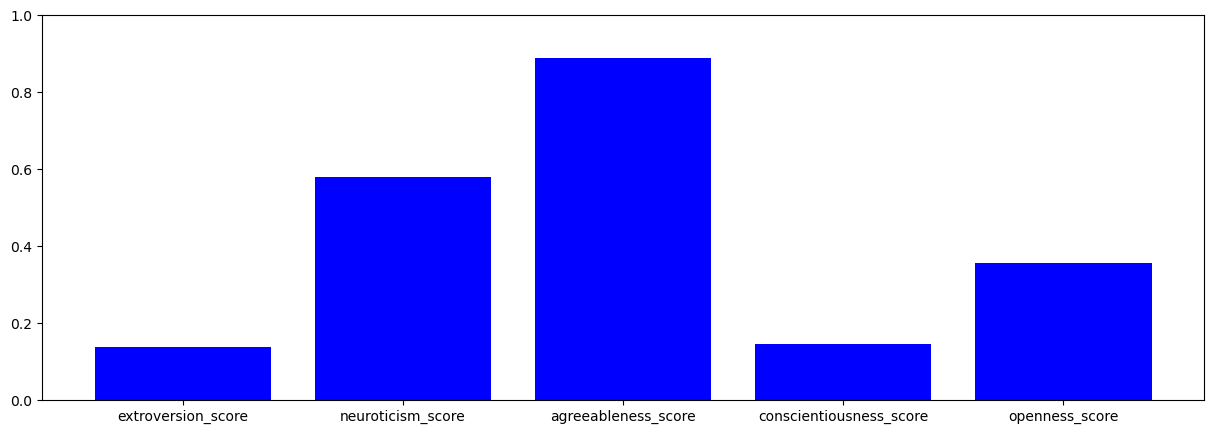

In [72]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['eight'].keys()), normalized_all_types_scores['eight'].values(), color='b')
plt.show()

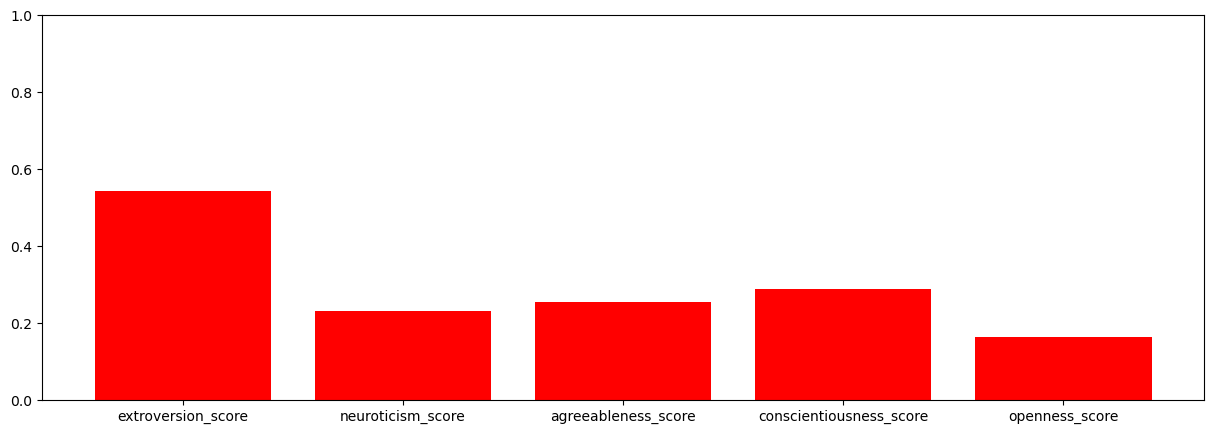

In [73]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['nine'].keys()), normalized_all_types_scores['nine'].values(), color='r')
plt.show()

In [74]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['ten'].keys()), normalized_all_types_scores['ten'].values(), color='b')
plt.show()

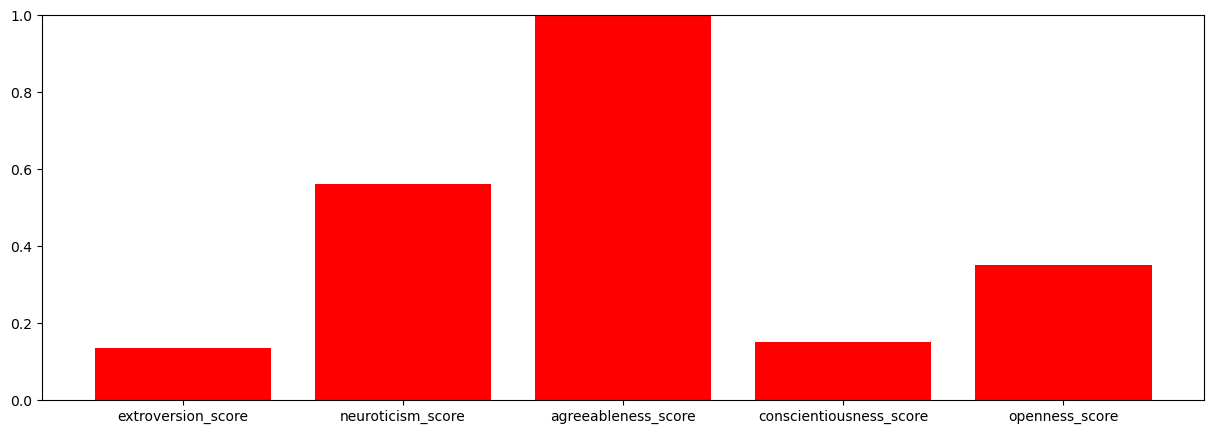

In [75]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['eleven'].keys()), normalized_all_types_scores['eleven'].values(), color='r')
plt.show()

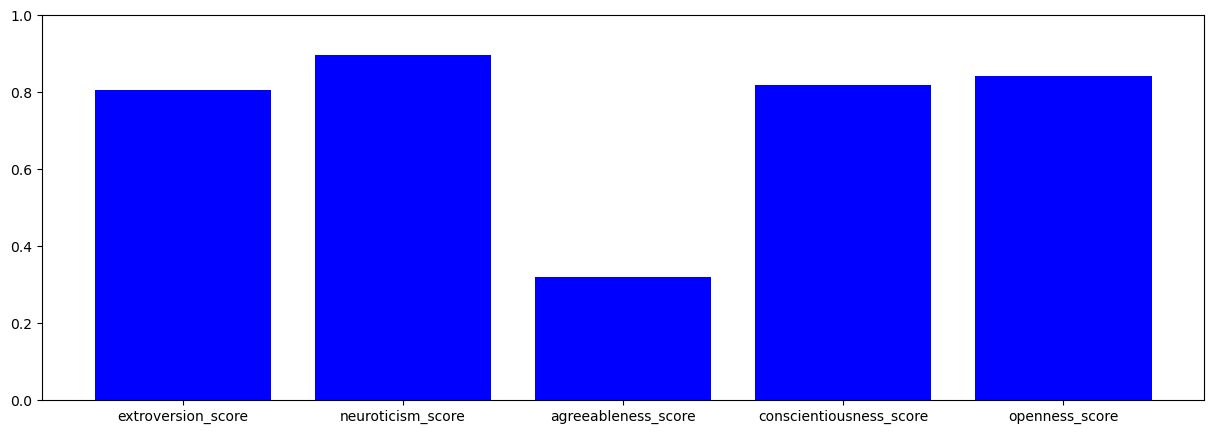

In [76]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['twelve'].keys()), normalized_all_types_scores['twelve'].values(), color='b')
plt.show()

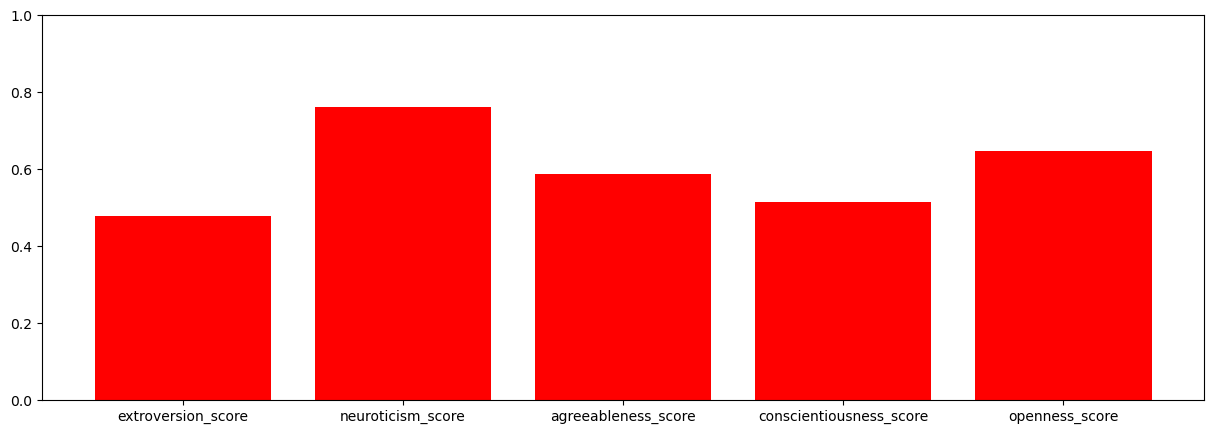

In [77]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['thirteen'].keys()), normalized_all_types_scores['thirteen'].values(), color='r')
plt.show()

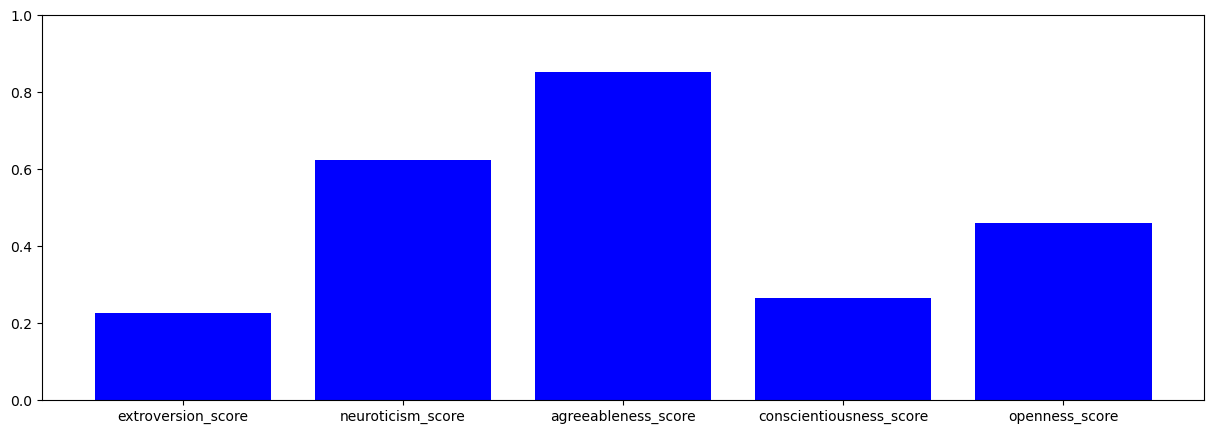

In [78]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['fourteen'].keys()), normalized_all_types_scores['fourteen'].values(), color='b')
plt.show()

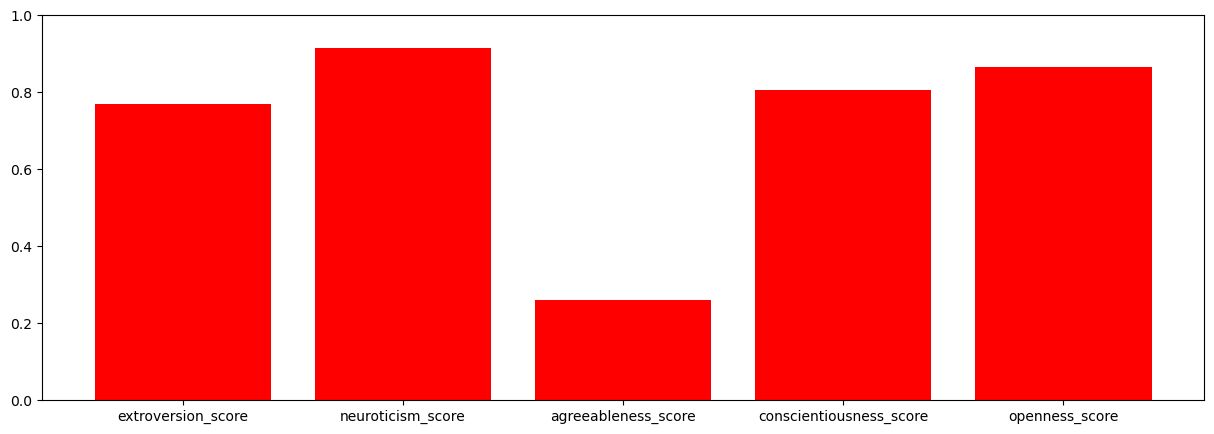

In [79]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['fifteen'].keys()), normalized_all_types_scores['fifteen'].values(), color='r')
plt.show()